In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [2]:
data = pd.read_csv('Apple_Store_Reviews.csv')
data

,Review_ID,App_Name,User_Age,Review_Date,Rating,Review_Text,Likes,Device_Type,Version_Used,Country,Purchase_Amount,Category
0,1,Candy Crush Saga,21,2023-01-16,4,"Great game, but too many in-game purchases.",70,iPhone 12,3.231.19,Australia,0.00,Games
1,2,Spotify,57,2024-02-01,1,"Good, but has connection issues sometimes.",49,iPhone SE,4.102.9,Germany,7.15,Music
2,3,TikTok,33,2023-11-30,5,Awesome app! Best entertainment content.,98,iPhone 12,7.52.0,Germany,4.98,Entertainment
3,4,Audible,40,2023-04-03,5,"Great app, but it's a bit pricey.",74,iPhone 13,5.260.15,Australia,0.00,Books
4,5,Spotify,44,2023-05-01,1,"Good, but has connection issues sometimes.",47,iPhone SE,4.50.18,Australia,14.31,Music
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Headspace,30,2023-11-15,3,"Good, but the premium content is expensive.",65,iPhone SE,6.284.11,US,0.00,Health
996,997,Duolingo,19,2024-09-27,1,Disappointing. Hard to follow and buggy.,4,iPhone SE,6.293.8,Canada,7.25,Education
997,998,Duolingo,38,2023-06-07,5,Excellent for learning new skills!,85,iPhone 11,10.277.15,Mexico,13.33,Education
998,999,Instagram,52,2024-03-04,4,"Great app, but sometimes it lags.",55,iPhone 13,3.52.20,US,6.37,Social


In [3]:
print("Dataset Overview:")
print(data.head())


Dataset Overview:
   Review_ID          App_Name  User_Age Review_Date  Rating  \
0          1  Candy Crush Saga        21  2023-01-16       4   
1          2           Spotify        57  2024-02-01       1   
2          3            TikTok        33  2023-11-30       5   
3          4           Audible        40  2023-04-03       5   
4          5           Spotify        44  2023-05-01       1   

                                   Review_Text  Likes Device_Type  \
0  Great game, but too many in-game purchases.     70   iPhone 12   
1   Good, but has connection issues sometimes.     49   iPhone SE   
2     Awesome app! Best entertainment content.     98   iPhone 12   
3            Great app, but it's a bit pricey.     74   iPhone 13   
4   Good, but has connection issues sometimes.     47   iPhone SE   

  Version_Used    Country  Purchase_Amount       Category  
0     3.231.19  Australia             0.00          Games  
1      4.102.9    Germany             7.15          Music  
2 

In [7]:
print("\n=== Central Tendency of Ratings ===")
print(f"Mean Rating: {mean_rating}")
print(f"Median Rating: {median_rating}")
print(f"Mode Rating: {mode_rating}")


=== Central Tendency of Ratings ===
Mean Rating: 2.869
Median Rating: 3.0
Mode Rating: 1


In [9]:
purchase_min = data['Purchase_Amount'].min()
purchase_max = data['Purchase_Amount'].max()
purchase_range = purchase_max - purchase_min
q1 = data['Purchase_Amount'].quantile(0.25)
q3 = data['Purchase_Amount'].quantile(0.75)
iqr_purchase = q3 - q1

print("\n=== Purchase Amount Statistics ===")
print(f"Purchase Amount Range: {purchase_range}")
print(f"IQR of Purchase Amount: {iqr_purchase}")



=== Purchase Amount Statistics ===
Purchase Amount Range: 19.97
IQR of Purchase Amount: 10.192499999999999


In [10]:
likes_variance = data['Likes'].var()
likes_std_dev = data['Likes'].std()

print("\n=== Likes Statistics ===")
print(f"Variance of Likes: {likes_variance}")
print(f"Standard Deviation of Likes: {likes_std_dev}")


=== Likes Statistics ===
Variance of Likes: 822.8546786786787
Standard Deviation of Likes: 28.685443672334557


In [11]:
correlation = data['Likes'].corr(data['Rating'])
print("\n=== Correlation ===")
print(f"Correlation between Likes and Rating: {correlation}")



=== Correlation ===
Correlation between Likes and Rating: 0.8425414470584173


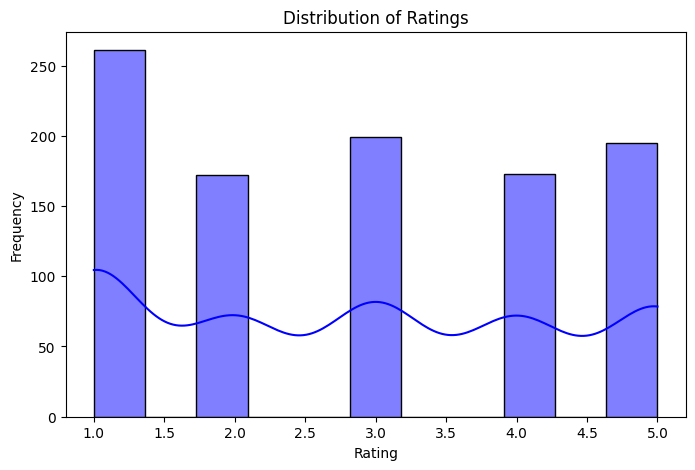

In [12]:
plt.figure(figsize=(8, 5))
sns.histplot(data['Rating'], kde=True, color='blue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [13]:
skewness = data['Rating'].skew()
print("\n=== Skewness of Ratings ===")
print(f"Skewness: {skewness}")
if skewness > 0:
    print("Ratings are positively skewed.")
elif skewness < 0:
    print("Ratings are negatively skewed.")
else:
    print("Ratings are symmetric.")


=== Skewness of Ratings ===
Skewness: 0.10182054838079216
Ratings are positively skewed.


In [21]:
instagram_ratings = data[data['App_Name'] == 'Instagram']['Rating']
whatsapp_ratings = data[data['App_Name'] == 'WhatsApp']['Rating']

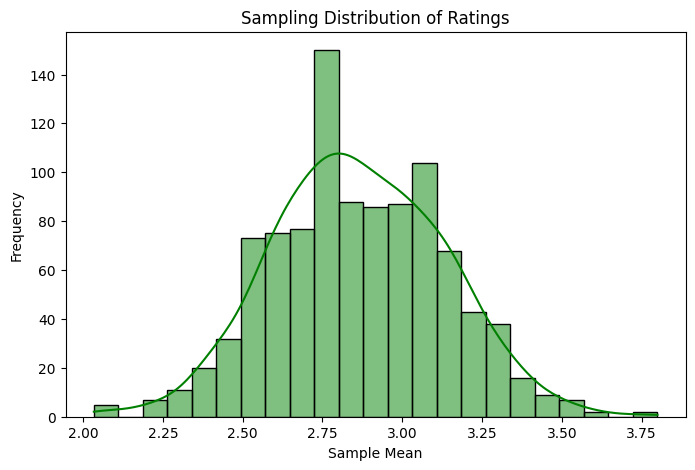


Sampling distribution shows the Central Limit Theorem in action.


In [20]:
sample_means = []
sample_size = 30
for _ in range(1000):
    sample = data['Rating'].sample(sample_size, replace=True)
    sample_means.append(sample.mean())

# Plot sampling distribution
plt.figure(figsize=(8, 5))
sns.histplot(sample_means, kde=True, color='green')
plt.title('Sampling Distribution of Ratings')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.show()

print("\nSampling distribution shows the Central Limit Theorem in action.")